# Software Hygiene

From this point onward we will be writing a lot of code in this course. Here we review some tips for keeping our code clean and easy to maintain!

Remember that code is read more than it is written. It is important to be sympathetic to the next person who has to read and understand your code, even if that will be future you!

Your goal is always to write code that can be read and understood as easily as possible by another person on your team, or your future self when coming back to a project. This will reduce the amount of time you spend working on code and in turn reduce the cost of projects, with compounding returns for complex projects. The more complex the project, the more important software hygiene is.

## Acknowledgements

Special thanks to my colleague, Rob Shemeley, for providing these tips which encapsulate decades of software engineering wisdom and leadership into a helpful set of tips for beginners!


## Further Reading

Many of these tips are inspired by the famous Clean Code book by Robert C. Martin. This book is excellent further reading, and essential reading if developing software professionally.

Most of this course will be taught in Python, and students should strive to write code that is idiomatic for Python. Beyond the tutorials presented in this class, suggestions for further reading on Python include:
* The [PEP 8 Style Guide](https://peps.python.org/pep-0008/)
* Python's tour of the standard library [part I](https://docs.python.org/3/tutorial/stdlib.html) and [part 2](https://docs.python.org/3/tutorial/stdlib2.html)
* Collection of Python resources: [https://docs.python.org/3/tutorial/whatnow.html](https://docs.python.org/3/tutorial/whatnow.html)
* The Zen of Python

## Use a Style Guide

Formatting code manually wastes valuable time that would be better spent writing code. Further, everyone on a team will have different opinions about how code should be formatted. This leads to differing formats on projects worked on by multiple people and time lost to debates about formatting. Avoid this and get back time writing the core code and functionality of your project by running autoformatters. You can configure your IDE to do this automatically. If I see your code is autoformatted, you will get extra credit on assignments!

Two great autoformatter tools are `black` and `isort`. You can install them with pip.

```bash
pip install black
pip install isort
```

A quick tutorial on using these in VSCode can be found at [https://code.visualstudio.com/docs/python/formatting](https://code.visualstudio.com/docs/python/formatting).

To get them setup in VSCode, you should install them as extensions (following the linked tutorial). Be sure to read the page on each extension in the Extensions tab of VSCode to learn how to set them up.

You will need to know how to open your JSON settings. Do this with the following actions.

`Cntrl` + `Shift` + `P` `->` Type `Preferences: Open User Settings (JSON)` in the command bar.

You will need to add something similar to the following text to this file to make VSCode format Python files with these tools on save.

```json
    "[python]": {
        "editor.defaultFormatter": "ms-python.black-formatter",
        "editor.formatOnSave": true,
        "editor.codeActionsOnSave": {
            "source.organizeImports": true
        },
    },
    "black-formatter.args": [
        "--line-length",
        "79"
    ],
    "isort.args": [
        "--profile",
        "black"
    ],
    "notebook.formatOnSave.enabled": true,
```

Be sure to check the documentation about each tool to learn how to configure it to your preferences and to match your preferred development environment.

Also, be sure to Google these tools to learn about them! It can be helpful to know how to run them on the command line and in your IDE.


## Write High Quality Commit Messages

Remember that commit messages are a log of the work you did on a project. The commit messages are a log of work done and should be descriptive so you can return to a previous version and know which version you are returning to.

Avoid non-descriptive commit messages like "stuff" or "wip". This is unprofessional and makes your teammates do extra work to figure out what you meant by these non-descriptive messages.

Bad:

```bash
git commit -m "stuff"
```

Good:
```bash
git commit -m "Add the unit conversion module"
```

A good commit message is grammatically correct and should read as "When applied, this commit will...".

The good commit message above would read as "When applied, this commit will add the unit conversion module".


## Use Well Thought-out, Descriptive Variable and Function Names

Variable and function names should be well thought-out and should ideally make your code read almost like english. A good rule is to make function names verbs (since the functions execute an action) and make variables names nouns since they define data. It also helps to add units to variable names so you can keep track of them (if not using another solution to keep track of units).

### Variable Name Examples

See below for good and bad variable name examples.

In [1]:
# Bad:
zz = 2
counter = 0
eval_flag = True

# Good:
z_measured_altitude_meters = 2
page_visits_counter = 0
# Avoid using flags if you can, they are difficult to test!

## Don't Commit Dead Code

A common anti-pattern is to have dead code in a system. Dead code is code that is commented out or otherwise unused. A few examples of dead code are below.

### Commented Out Code

Here we look at an anti-pattern for commented out dead code. Do not do this!

These two lines of code look very similar. Why is one commented out another not commented out? This might have been clear to the original developer but will not be clear to future developers. What are the consequences of using the old model of the system instead of the new model? Someone might be tempted in the future to find out by uncommenting the second assignment. If this is an out of date model, then this could lead to harmful consequences.

In [2]:
x_input = 2
system_output = 2 * x_input**2 + 4 * x_input + 1
# Old system output
# system_output = 3 * x_input ** 2 + 4 * x_input + 2

### Flagged Out Code

Here we look at an anti-pattern for flagged out dead code. Do not do this either!

This is just as bad as the example with commented out code (and in some cases worse). When should future developers change the `use_old_system_model` flag? Is the line covered by that flag tested? Is it ok to change the flag to true? Since the flag is set to `False` no tests will cover that line.

In [3]:
x_input = 2
system_output = 2 * x_input**2 + 4 * x_input + 1
use_old_system_model = False
if use_old_system_model:
    system_output = 3 * x_input**2 + 4 * x_input + 2

### Guiding Notes on Dead Code

Remember that code is a liability. You want to have a little code in your system as possible because every line of code written presents extra risk for error and costs more for future teammates (or your future self) to read and maintain. You can comment out lines of code locally when debugging and trying out ideas. Never push this kind of mess to git for your teammates or future self to deal with though!

If you find yourself needing to try out multiple ideas in your code and wanting to keep them both to experiment with, this is when you should be using git branches.

## Write High Quality Code in Python and Call from Notebooks (Rather Than Developing Inside Notebooks)

Notebooks are useful for seeing results of code inline with the code, for explaining ideas with styled markdown next to code, and for keeping plots close to the code that generated them (some which Tufte, the author of the famous Visual Display of Quantitative Information, would appreciate).

Jupyter notebooks are also useful for working on code where it is helpful to run blocks of the code out of order, or helpful to run some blocks of code several times before proceeding to the next blocks. For example, Jupyter is a popular tool for training and testing machine learning models, which is why we employ it often in this course. A first set of cells in a machine learning notebook would unpack the data. These cells might be run multiple times until the data scientist is sure the data is extracted correctly. A next set of cells might then train a model from the data to make inferences on new data, providing some metrics on the model after each training run. The data scientist might then repeat these cells multiple times until the metrics are satisfactory before proceeding with testing the model on held out data.

These are all excellent use cases for Jupyter. However, developing complex algorithms and systems directly in Jupyter notebooks should be avoided. This is because the ability to run cells out of order can cause unexpected errors if we are not careful about how we store and name our variables. For example, if you have an algorithm that spans multiple cells in a notebook, you might run the first cells after running some middle cells and before running your end cell. This can cause unexpected results. This can be especially dangerous when running cells out of order causes the result in the final cell to be correct for the wrong reason. Then you might think your code works, push it so your teammates can use it, and then realize they cannot reproduce your results.

You might be tempted to keep all the code for a single algorithm in a single Jupyter cell to solve this problem. This will introduce other problems for maintainability though. Code (like prose) is easier to read and digest in small blocks. Having code grouped together just to control how your teammates can and cannot execute it in Jupyter is a misuse of Jupyter's cells and will cause your teammates to have to read and digest unnecessarily large blocks of code which is burdensome and time consuming on them.

The way to solve this problem is to develop code inside importable, self contained Python modules (individual files) or Python packages (folders structured as importable libraries in Python). Breaking code into separate files can be helpful for all of the following reasons.

* Breaking code into separate files ensures that Jupyter notebook cell execution order will not corrupt the state of your variables, without making cells too long.
* Each file is independently testable and once determined to be working does not need to be touched again.
* Each file can handle a single responsibility (do one thing and one thing well) so that you know exactly where to look if a part of your system or analysis tools are not functioning correctly.
* When collaborating with teammates, it will be easier to divide work between files and avoid conflicts when merging with git (so called *merge conflicts*) by working on separate files.
* When working on complex projects across multiple organizations, it will be easier to determine what organization is responsible for the code in each file. (This applies in industry, outside the context of this course.)

Making a full Python package can be complex, so you can make a simple Python module instead. An example is included in this directory. It is imported and called below.

In [4]:
%load_ext autoreload
%autoreload 2

# Be sure to use the autoreload directive at the top of your notebook so that
# Jupyter will reload any changes you make to your module in its file.

In [1]:
# Use this line to import the function you need (in this case, generate
# letters) from the file (in this case, character_generator.py)

from character_generator import generate_letters

# Call the function from our module to get a dataset
letters_list = ["A", "B"]
noise_amounts_db = [-100, -20, -10, -5, 0, 5, 10, 20, 100]

letters_df = generate_letters(
    letters_list, noise_amounts_db, number_of_instances_per_letter=100
)

letters_df

,Letter Pixels,Clean Letter Pixels,SNR Values (dB),Labels,Strings
0,"[[25861.15289983022, 61485.27191477202, 24728....","[[0, 1, 1, 1, 0], [1, 0, 0, 0, 1], [1, 1, 1, 1...",-100,65,A
1,"[[-14.136080730977527, -0.3078745784802641, -2...","[[0, 1, 1, 1, 0], [1, 0, 0, 0, 1], [1, 1, 1, 1...",-20,65,A
2,"[[0.7592656672352143, -0.9362861224739187, 2.7...","[[0, 1, 1, 1, 0], [1, 0, 0, 0, 1], [1, 1, 1, 1...",-10,65,A
3,"[[1.1921896397444807, 0.540606797444041, -0.97...","[[0, 1, 1, 1, 0], [1, 0, 0, 0, 1], [1, 1, 1, 1...",-5,65,A
4,"[[-0.4873740822148873, 1.6453945885639123, 0.9...","[[0, 1, 1, 1, 0], [1, 0, 0, 0, 1], [1, 1, 1, 1...",0,65,A
...,...,...,...,...,...
1795,"[[-0.9860012729273087, 0.23428642577888692, 1....","[[1, 1, 1, 1, 0], [1, 0, 0, 0, 1], [1, 1, 1, 1...",0,66,B
1796,"[[0.7573622143772144, 0.8685516200456382, 1.07...","[[1, 1, 1, 1, 0], [1, 0, 0, 0, 1], [1, 1, 1, 1...",5,66,B
1797,"[[0.7996594058592301, 1.0753903325387861, 0.84...","[[1, 1, 1, 1, 0], [1, 0, 0, 0, 1], [1, 1, 1, 1...",10,66,B
1798,"[[0.9956266404771665, 0.9996203197013385, 0.97...","[[1, 1, 1, 1, 0], [1, 0, 0, 0, 1], [1, 1, 1, 1...",20,66,B


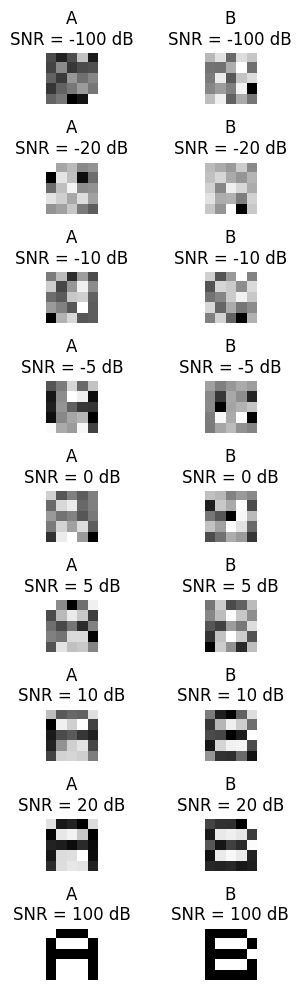

In [6]:
# Import and call another function from our module to visualize the dataset
from character_generator import visualize_letters_dataframe

letters = ["A", "B"]
snr_values = [-100, -20, -10, -5, 0, 5, 10, 20, 100]

visualize_letters_dataframe(letters_df, snr_values, letters)

## Write High Quality Documentation in Comments or Notebooks

### Notebooks, Scripts, and Modules
As seen in this notebook and many of the other example notebooks in class, remember to write high quality documentation for your code. If writing a notebook, be sure to explain your plots, derive any key equations, and keep plots close to their explanations and related concepts.

If writing a Python script, be sure to include comments. At minimum, include comments at the top of the script stating its purpose, how to use it, and any known issues.

For Python modules, use docstrings for each module, function, and class. Adhere to a standard, like the Google Style Guide to make your docstrings consistent.

In this class, README.md files will be mostly made for you. Professionally, you should always make a descriptive README file for any project or repository you create.

### General Guidance 

For any lines that would look surprising to you, explain those with a specific comment. Keep in mind that any time you are writing a comment that explains how your code works, you are probably writing code that is too surprising! Strive to write simpler code that will be self documenting, using variable names, function names, and the structure of the code to make your code read like prose. Save comments to explain why you did something, and let the code itself explain how you did it.

With all documentation, write as if writing to a teammate or a future version of yourself needing to pick up the project after forgetting about its details and being busy with other projects for a while. Try to momentarily "switch off" the part of your mind that has been deeply involved in the code you are writing and look at it with fresh eyes. If it wouldn't make sense to you without having stared at it for a few hours, it will not make sense to you in a few months! Be kind to yourself and explain it in the code.

Remember that the further your documentation is away from your code, plots, and any data you are analyzing in the project, the more likely it will be to get out of date. Keep your documentation close to the information it is documenting so when that information changes you (or others) will notice the discrepancy and change it.

Above all, remember that for any code you write, it should be immediately obvious to anyone you work with (and to anyone who has to run that code) what it does and how to use it. This seems obvious for small projects, but is not always obvious for big projects. A common pitfall in professional settings is for different teams to develop projects that other teams besides their own cannot run. This might be due to undocumented dependencies, writing surprising or unusual code not adhering to the idioms of the language, or simply a complete lack of documentation.

Complete documentation should explain all of the following.

* What does the software do?
* How can a new user run the software?
* What dependencies are required to run the software?
* Is any development environment set up required?

## Write Unit Tests!

This is an introductory course and not all assignments will require unit tests.

However, in professional settings, code may not be written unless a test has been written first. Then, only the minimum code required to make the test pass may be written. This practice of TDD is essential to ensuring that code meets requirements and that unneeded costs and liabilities are not incurred due to extra code being written.

Professionally, many levels of testing are employed for different levels of the system. Unit tests check that each individual function is performing as expected and are essential. If code does not have unit tests, it is not considered maintainable since there is no way to check it is performing as intended once changing it. Additional tests can be employed to ensure that a system functions correctly as a whole, that parts of a system interface correctly with each other, and that a system meets formal requirements specified by a customer.

The recommended unit test frameworks in Python are `unittest` and `pytest`. We will use `pytest` in this course. Unit testing will be covered later in this lesson. Other types of testing for machine learning systems specifically will be covered in later classes.
